In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import *
from visualizingData import *
import pandas as pd
import os
import ast

from decimal import Decimal

In [2]:
# Load the data from the specified .npz file
file = np.load("..\\..\\data_manip\\provided_data\\FTICR.npz", allow_pickle=True)

# # Extract the necessary components from the file
print(file.files)

selected_B = file['selected_B'][()]
shape = file['shape'][()]
mz_values = file['mz'][()]

ground_truth = selected_B


['selected_B', 'shape', 'mz']


In [3]:
ground_truth.shape

(400, 1372421)

In [4]:
loaded_matrix = np.load('..\\..\\methods\\FTICR_SAMPLED_DATA\\FTICR_4_uni20_cli50.npy', allow_pickle=True).item()
mask_ = np.load('..\\..\\methods\\FTICR_SAMPLED_DATA\\MASK4_uni20_cli50.npy', allow_pickle=True).item()
dense_matrix = loaded_matrix.toarray()
mask = mask_.toarray()

In [5]:
DENSE, MASK = dense_matrix, mask

In [6]:
DENSE,MASK = sample_array_with_mask(DENSE,MASK,400,100000)

In [7]:
DENSE.shape

(400, 100000)

In [8]:
# Matrix dimensions
m, n = DENSE.shape

# Initializing matrices and variables
R = DENSE  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparametersgamma = .001
delta = 1e-7  # Tolerance level for optimization
num_iterations = 1000  # Number of iterations for optimization
r_stop = min(m,n)//10
gamma=.001

# Generate rhos for each lambda
rho= 1/(500*(max(n,m)))

lamda=rho*.1  # Regularization parameter λ values

# LAMDA ALS FUNCTIE VAN RHO EN CURVEFITTEN VOOR WELKE WAARDE VAN X IK RHO*X= LAMDA MOET UITVOEREN

In [9]:
r_stop

40

In [10]:
# Calculate epsilon based on matrix size and gamma
epsilon = m * n * gamma  # Error threshold as defined in the paper

# Run the optimization function with the current parameters
P_final, Z_final, u_final, y_final, s_final, r_errors, rank_history = LMSC_optimize_rank_stop(
    rho, lamda, R, P_init, MASK, u_init, y_init, s_init, delta, epsilon, num_iterations, r_stop
)

Is lambda smaller then rho?: True
0: rank=2
5: rank=11
10: rank=10
15: rank=18
20: rank=24
25: rank=41


In [13]:
rel_errors = np.array(r_errors)

In [15]:
rel_errors

array([[5.78830140e+01, 4.91497245e-02, 5.79321638e+01],
       [1.05214322e+02, 7.21736625e+00, 1.12431688e+02],
       [3.01700821e+02, 2.44275471e+01, 3.26128368e+02],
       [1.58716867e+03, 3.49214631e+01, 1.62209014e+03],
       [9.34296731e+03, 3.12308825e+01, 9.37419820e+03],
       [5.64031045e+04, 2.90174633e+01, 5.64321220e+04],
       [3.46679570e+05, 2.58991667e+01, 3.46705469e+05],
       [2.15113438e+06, 2.65540786e+01, 2.15116094e+06],
       [1.34047340e+07, 2.79315808e+01, 1.34047620e+07],
       [8.36790337e+07, 3.90646104e+01, 8.36790728e+07],
       [5.22741782e+08, 5.70808109e+01, 5.22741839e+08],
       [3.26650476e+09, 7.82081118e+01, 3.26650483e+09],
       [2.04140756e+10, 8.96033348e+01, 2.04140756e+10],
       [1.27584024e+11, 9.96755875e+01, 1.27584024e+11],
       [7.97390274e+11, 1.09894835e+02, 7.97390274e+11],
       [4.98366453e+12, 1.23370578e+02, 4.98366453e+12],
       [3.11478416e+13, 1.34260154e+02, 3.11478416e+13],
       [1.94673856e+14, 1.42944

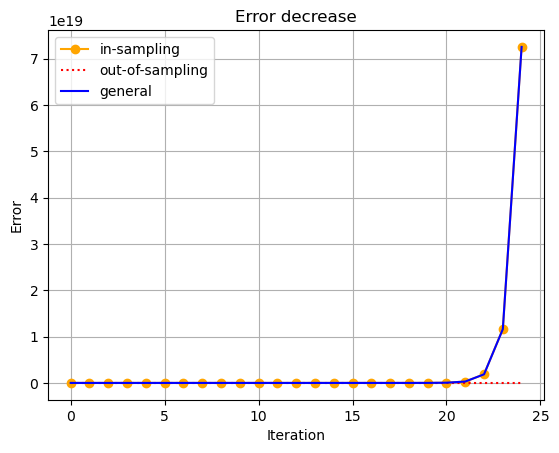

In [14]:
relErrorPlot(r_errors)

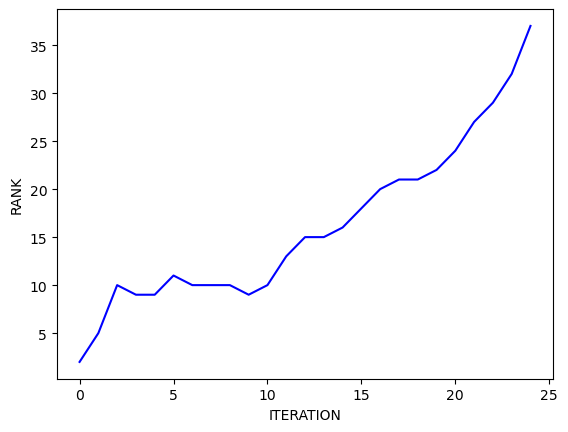

In [11]:
# Plot the values
plt.plot(rank_history, linestyle='-', color='b', label='Values')

# Add labels and title
plt.xlabel('ITERATION')
plt.ylabel('RANK')
# plt.yscale('log')

# Display the plot
plt.show()


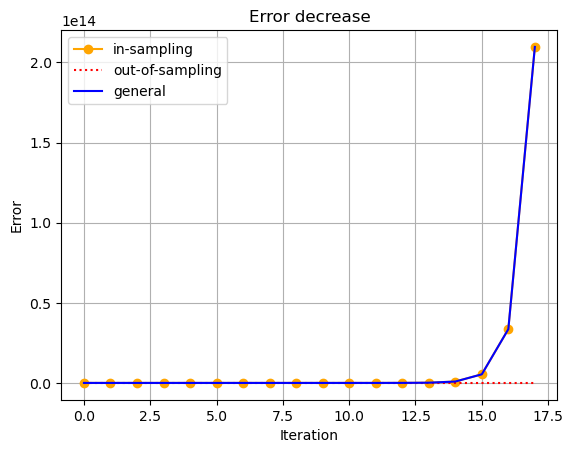

In [20]:
relErrorPlot(r_errors)

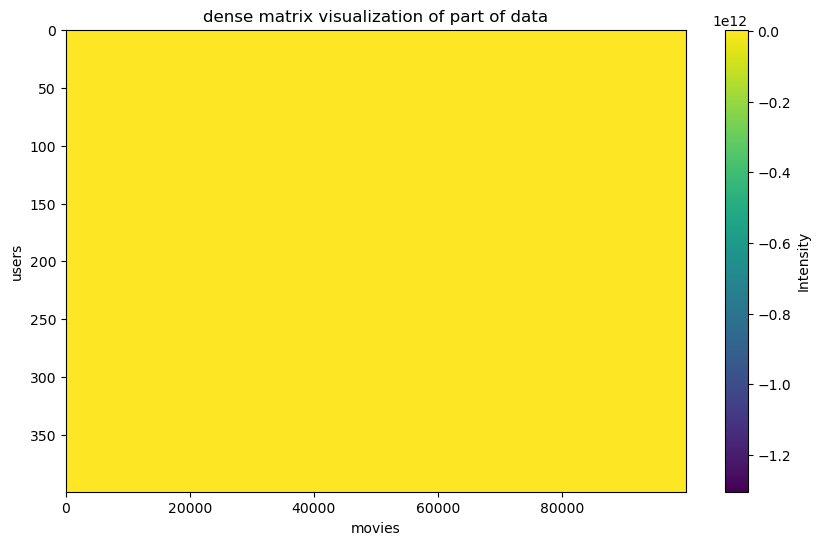

In [ ]:
visualizeData()

In [90]:
lamda/rho

0.1

In [94]:
rank

200

In [91]:
errors

[[24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [24260.558581490543, 24641.08389194825],
 [26216.46225631883, 24550.125937894445],
 [28408.999061118622, 24457.860588851094],
 [30592.574709252, 24376.27614376084],
 [32765.422354229457, 24305.401973662487],
 [34927.766606864585, 24245.16617010714],
 [37079.79503716391, 24195.48548608388],
 [39221.66726233566, 24156.26514911831],
 [41353.5214195149, 24127.398861283837],
 [43475.478873656866, 24108.768947646684],
 [45587.647705900155, 24100.24662677374],
 [47690.12534128355, 24101.69238384777],
 [49783.000557564315, 24112.956430927603],
 [51866.355041402996, 24133.879241219627],
 [53940.264608434045, 24164.29214561

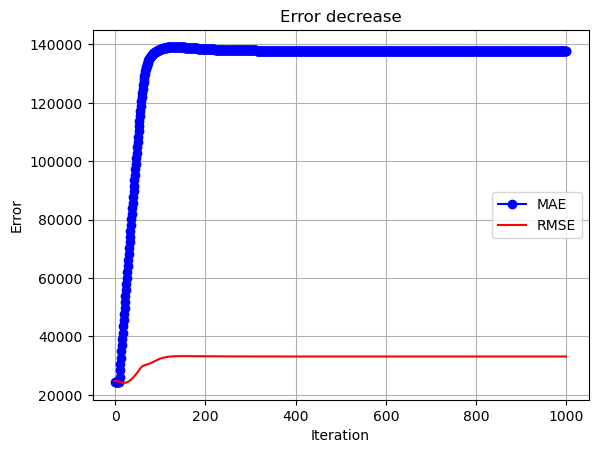

In [92]:
# relErrorPlot(errors=r_errors)
errorPlot(errors=errors)

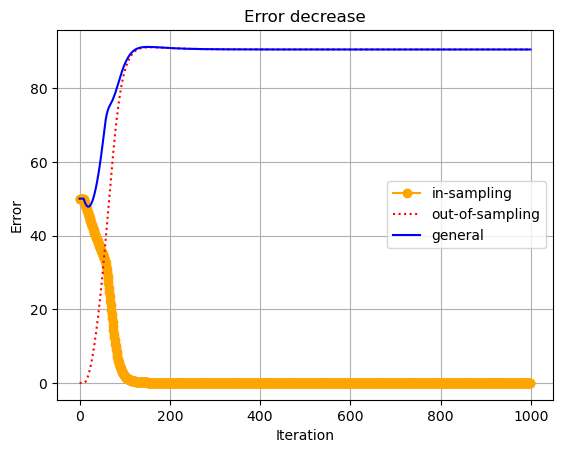

In [93]:
relErrorPlot(r_errors)

In [95]:
allErrors(ground_truth[:2000,:2000], Z_final, MASK)

(1.707106026450482e-07, 23.160207593562376, 23.160207764272982)

In [96]:
allErrors(ground_truth[:2000,:2000], P_final, MASK)

(1.707106026450482e-07, 23.160207593562376, 23.160207764272982)

In [98]:
csc_matrix(Z_final).nnz/np.prod(Z_final.shape)

1.0

In [ ]:

def SVD_truncated(A, k):
    """
    Apply the thresholding operator to the singular values of X
    """
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n= len(S)
    
    if k > n:
        k = n
    
    S= S[:k]
    U = U[:, :k]
    V = V[:k, :]
    return (U* S) @ V


In [67]:
100* np.linalg.norm(SVD_truncated(dense_matrix,20)-dense_matrix, 'fro')/np.linalg.norm(dense_matrix, 'fro')


35.45712492799889

In [97]:
100*np.linalg.norm((P_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

ValueError: operands could not be broadcast together with shapes (400,2000) (400,1372421) 

In [65]:
100*np.linalg.norm((Z_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

49.86943779810618